In [1]:
from __future__ import division
from __future__ import with_statement
from __future__ import print_function

%load_ext autoreload
%autoreload 2

import numpy as np
import deepmodels
import json
import time
import argparse
import os.path
import subprocess
import imageutils
import utils
import deepmodels_torch
import deepmodels_torch_facenet
from facenet_pytorch import InceptionResnetV1
import torch
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_path = '/home/vk352/FaceDetection/datasets/vgg_face2/train_aligned/'

id_set = set([f for f in os.listdir(data_path) if not f.endswith("txt")])
id_list = list(id_set)
print(len(id_list))

8631


In [4]:
print('n005706' in id_list)

False


In [5]:
data_path = '/home/vk352/FaceDetection/datasets/vgg_face2/test_aligned/'

id_set = set([f for f in os.listdir(data_path) if not f.endswith("txt")])
test_id_list = list(id_set)
print(len(test_id_list))
print('n005706' in test_id_list)

500
True


In [70]:
model = InceptionResnetV1(pretrained='vggface2').eval().to("cuda")
model.classify = True

In [71]:
K = 100
image_dims = (200, 200)

In [79]:
features = []
for i, person_id in enumerate(id_list):
    if i % 50 == 0:
        print("iter: {} / {}".format(i, len(id_list)))
        torch.save({"features": features}, "/home/vk352/FaceDetection/datasets/vgg_face2/train_facenet_pretrained_features.pth")
    images = ["{}/{}/".format(data_path, person_id)+f for f in os.listdir("{}/{}/".format(data_path, person_id)) if os.path.isfile(os.path.join("{}/{}/".format(data_path, person_id), f))]
    #print(images)
    data = torch.from_numpy(np.array(list(utils.image_feed(images[:K],image_dims)))).permute(0, 3, 1, 2).to("cuda").float()
    feature = model(data)
    features.append(feature.data.cpu())
    del data, feature
    

iter: 0 / 8631
iter: 150 / 8631
iter: 200 / 8631
iter: 250 / 8631
iter: 300 / 8631
iter: 350 / 8631
iter: 400 / 8631
iter: 450 / 8631
iter: 500 / 8631
iter: 550 / 8631
iter: 600 / 8631
iter: 650 / 8631
iter: 700 / 8631
iter: 750 / 8631
iter: 800 / 8631
iter: 850 / 8631
iter: 900 / 8631
iter: 950 / 8631
iter: 1000 / 8631
iter: 1050 / 8631
iter: 1100 / 8631
iter: 1150 / 8631
iter: 1200 / 8631
iter: 1250 / 8631
iter: 1300 / 8631
iter: 1350 / 8631
iter: 1400 / 8631
iter: 1450 / 8631
iter: 1500 / 8631
iter: 1550 / 8631
iter: 1600 / 8631
iter: 1650 / 8631
iter: 1700 / 8631
iter: 1750 / 8631
iter: 1800 / 8631
iter: 1850 / 8631
iter: 1900 / 8631
iter: 1950 / 8631
iter: 2000 / 8631
iter: 2050 / 8631
iter: 2100 / 8631
iter: 2150 / 8631
iter: 2200 / 8631
iter: 2250 / 8631
iter: 2300 / 8631
iter: 2350 / 8631
iter: 2400 / 8631
iter: 2450 / 8631
iter: 2500 / 8631
iter: 2550 / 8631
iter: 2600 / 8631
iter: 2650 / 8631
iter: 2700 / 8631
iter: 2750 / 8631
iter: 2800 / 8631
iter: 2850 / 8631
iter: 2900 /

In [80]:
feature_mean = [feature.mean(0) for feature in features]

In [81]:
feature_mean_numpy = torch.stack(feature_mean, dim=0).cpu().numpy()
print(feature_mean_numpy.shape)

(8631, 8631)


In [82]:
def dist(feat, dist_type="l2"):
    if dist_type == "l2":
        return euclidean_distances(feat)
    elif dist_type == "cos":
        return cosine_distances(feat)
    
def get_image(person_id):
    images = ["{}/{}/".format(data_path, person_id)+f for f in os.listdir("{}/{}/".format(data_path, person_id)) if os.path.isfile(os.path.join("{}/{}/".format(data_path, person_id), f))]
    return mpimg.imread(images[0])


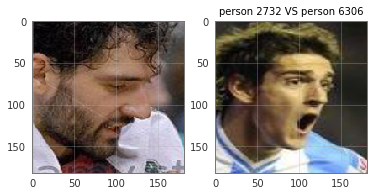

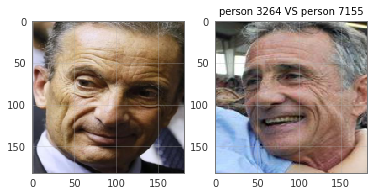

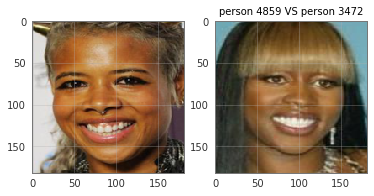

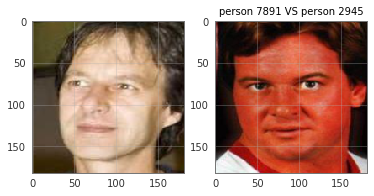

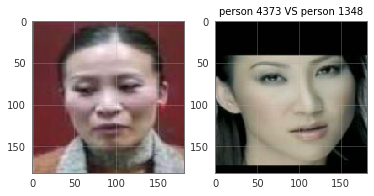

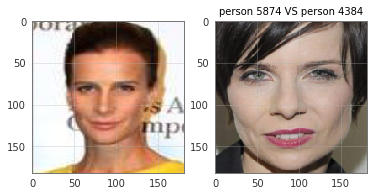

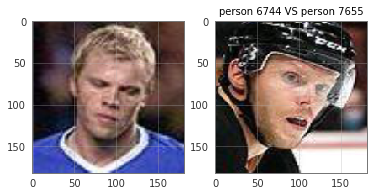

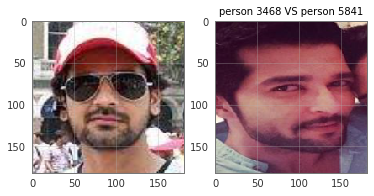

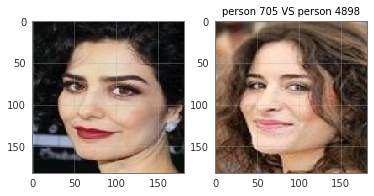

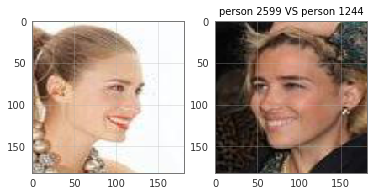

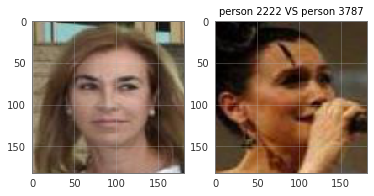

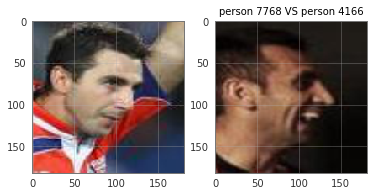

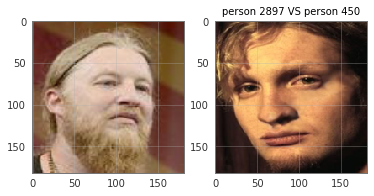

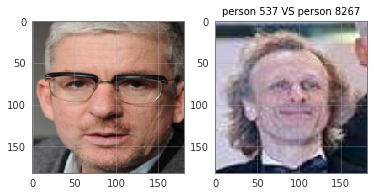

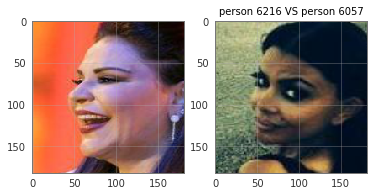

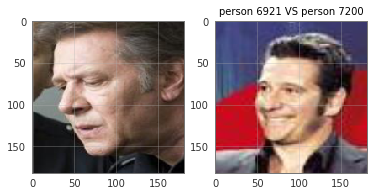

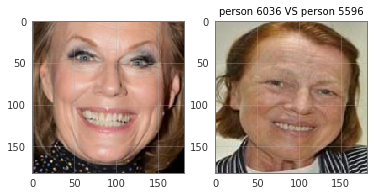

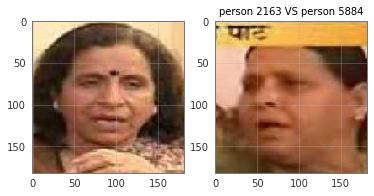

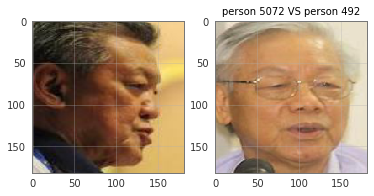

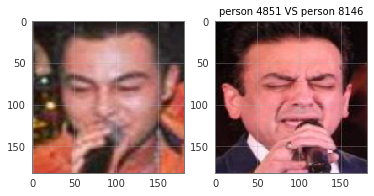

In [83]:
pair_wise_dist = dist(feature_mean_numpy)
rank = np.argsort(pair_wise_dist)
np.random.seed(0)
for i in np.random.choice(len(id_list), 20):
    f, axarr = plt.subplots(1, 2)
    nei = rank[i, 1]
    img = get_image(id_list[i])
    img_nei = get_image(id_list[nei])
    axarr[0].imshow(img)
    axarr[1].imshow(img_nei)
    plt.title("person {} VS person {}".format(i, nei))
    plt.show()

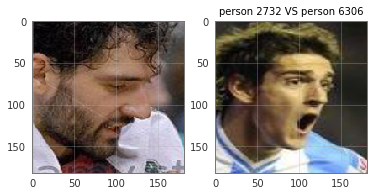

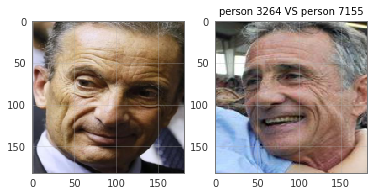

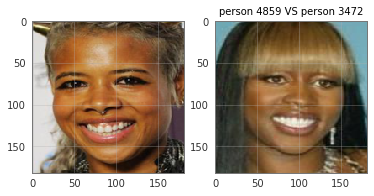

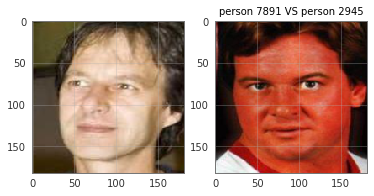

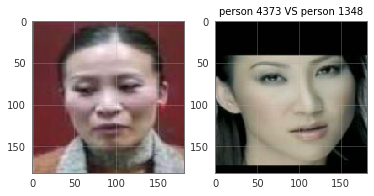

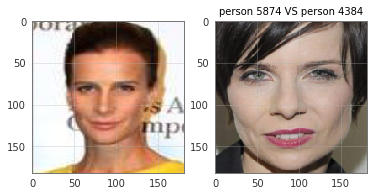

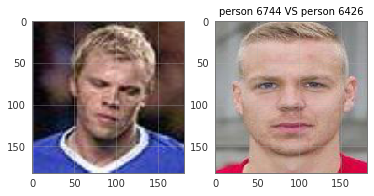

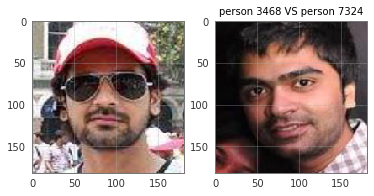

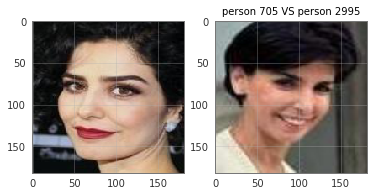

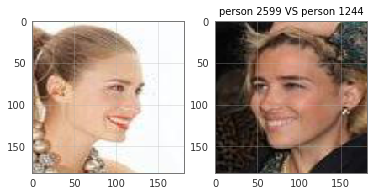

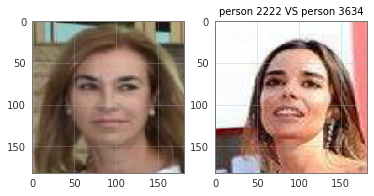

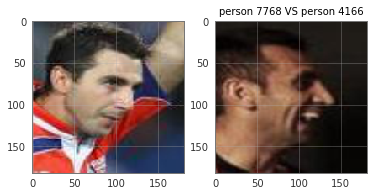

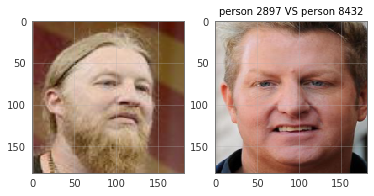

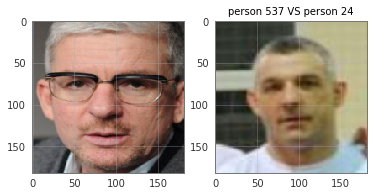

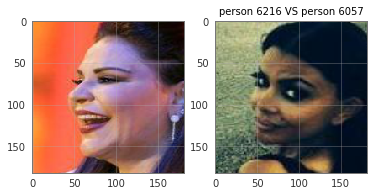

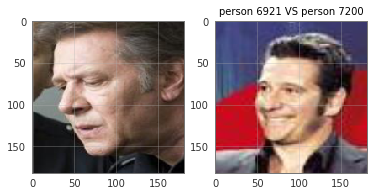

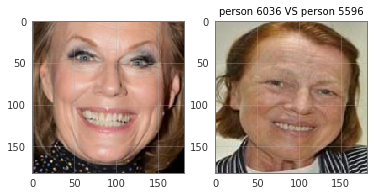

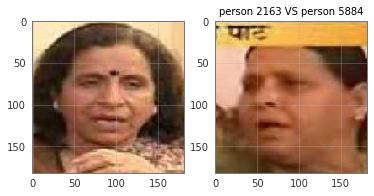

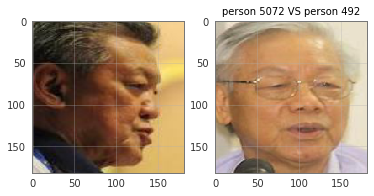

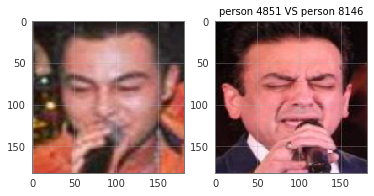

In [84]:
pair_wise_dist = dist(feature_mean_numpy, dist_type="cos")
rank = np.argsort(pair_wise_dist)
np.random.seed(0)
for i in np.random.choice(len(id_list), 20):
    f, axarr = plt.subplots(1, 2)
    nei = rank[i, 1]
    img = get_image(id_list[i])
    img_nei = get_image(id_list[nei])
    axarr[0].imshow(img)
    axarr[1].imshow(img_nei)
    plt.title("person {} VS person {}".format(i, nei))
    plt.show()